<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/6_2_Pivot_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pivot_table

피벗테이블을 활용하면 테이터를 쉽게 정리할 수 있습니다. 
table = pd.pivot_table(df, values='D', index=['A', 'B'],
                    columns=['C'], aggfunc=np.sum)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

아파트 실거래가를 데이터를 정리해봅시다. 

http://rtdown.molit.go.kr/

In [1]:
# from google.colab import drive
# drive.mount('/g')

In [2]:
import pandas as pd

# data 읽기
# data = pd.read_csv('/g/My Drive/Tensorflow AI/아파트(매매)__실거래가_20210227120005.csv', encoding='cp949',
#                    skiprows = 15)  #skiprows 옵션을 통해 불필요한 행을 건너뛸수 있습니다
data = pd.read_csv('data/아파트(매매)__실거래가.csv', encoding='cp949', skiprows = 15)

In [3]:
data

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일
0,강원도 강릉시 견소동,202,0202,0,송정한신,84.930,202102,2,"18,000",7,1997,경강로2539번길 8,NaN
1,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202102,5,"13,500",12,1997,경강로2539번길 8,NaN
2,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202102,5,"14,200",3,1997,경강로2539번길 8,NaN
3,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202102,8,"15,700",14,1997,경강로2539번길 8,NaN
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202102,9,"19,100",10,1997,경강로2539번길 8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50493,충청북도 충주시 호암동,547-6,0547,6,호반현대,59.760,202102,27,"9,900",10,1994,신촌2길 28,NaN
50494,충청북도 충주시 호암동,547-6,0547,6,호반현대,59.760,202102,28,"7,500",6,1994,신촌2길 28,NaN
50495,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,99.870,202102,7,"54,500",17,2019,호암토성2로 1,NaN
50496,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,84.890,202102,26,"42,800",1,2019,호암토성2로 1,NaN


In [4]:
data.columns

Index(['시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일', '거래금액(만원)',
       '층', '건축년도', '도로명', '해제사유발생일'],
      dtype='object')

In [5]:
# 연산을 위해 숫자형으로 되어 있는지 확인
data.dtypes

시군구          object
번지           object
본번           object
부번            int64
단지명          object
전용면적(㎡)     float64
계약년월          int64
계약일           int64
거래금액(만원)     object
층             int64
건축년도          int64
도로명          object
해제사유발생일     float64
dtype: object

df.str.replace를 통해 한번에 컬럼의 문자열을 변경할 수 있다

In [6]:
# 문자로 인식된 것을 숫자로 바꾼다. 그러려면 ,를 먼저 삭제해야 한다
data['거래금액(만원)'] = data['거래금액(만원)'].str.replace(',','')   

In [7]:
data['거래금액(만원)']

0        18000
1        13500
2        14200
3        15700
4        19100
         ...  
50493     9900
50494     7500
50495    54500
50496    42800
50497    16000
Name: 거래금액(만원), Length: 50498, dtype: object

astype()을 통해서 데이터 타입 변경이 가능하다

In [8]:
data['거래금액(만원)'] = data['거래금액(만원)'].astype('int')

In [9]:
# 비교를 위해 평당가격을 계산한다. 
df = data.assign(평당단가 = data['거래금액(만원)']/data['전용면적(㎡)'])

In [10]:
df

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,평당단가
0,강원도 강릉시 견소동,202,0202,0,송정한신,84.930,202102,2,18000,7,1997,경강로2539번길 8,NaN,211.939244
1,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202102,5,13500,12,1997,경강로2539번길 8,NaN,225.752508
2,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202102,5,14200,3,1997,경강로2539번길 8,NaN,237.458194
3,강원도 강릉시 견소동,202,0202,0,송정한신,59.800,202102,8,15700,14,1997,경강로2539번길 8,NaN,262.541806
4,강원도 강릉시 견소동,202,0202,0,송정한신,84.945,202102,9,19100,10,1997,경강로2539번길 8,NaN,224.851374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50493,충청북도 충주시 호암동,547-6,0547,6,호반현대,59.760,202102,27,9900,10,1994,신촌2길 28,NaN,165.662651
50494,충청북도 충주시 호암동,547-6,0547,6,호반현대,59.760,202102,28,7500,6,1994,신촌2길 28,NaN,125.502008
50495,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,99.870,202102,7,54500,17,2019,호암토성2로 1,NaN,545.709422
50496,충청북도 충주시 호암동,1191,1191,0,호암 힐데스하임,84.890,202102,26,42800,1,2019,호암토성2로 1,NaN,504.181882


### 경기도 안양시 분석
* 지역 편차가 크므로 한개의 시에 대해서 아파트 가격 요인을 분석해봅시다

In [11]:
df.시군구.unique()

array(['강원도 강릉시 견소동', '강원도 강릉시 교동', '강원도 강릉시 내곡동', ..., '충청북도 충주시 칠금동',
       '충청북도 충주시 풍동', '충청북도 충주시 호암동'], dtype=object)

In [12]:
# 안양시 선택
안양 = df.시군구.str.contains('안양')

In [13]:
안양

0        False
1        False
2        False
3        False
4        False
         ...  
50493    False
50494    False
50495    False
50496    False
50497    False
Name: 시군구, Length: 50498, dtype: bool

In [14]:
anyang_df = df[안양]

In [15]:
anyang_df.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,평당단가
10797,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.80,202102,1,34000,11,1993,학의로 168,NaN,682.730924
10798,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.80,202102,6,47500,8,1993,학의로 168,NaN,953.815261
10799,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.80,202102,8,49000,8,1993,학의로 168,NaN,983.935743
10800,경기도 안양동안구 관양동,1587,1587,0,공작럭키,49.80,202102,19,53250,3,1993,학의로 168,NaN,1069.277108
10801,경기도 안양동안구 관양동,1587-5,1587,5,공작성일,59.64,202102,4,62800,3,1993,달안로 153,NaN,1052.984574


In [16]:
# 경기도 안양시 이외에 안양이 들어간 곳이 있는 확인
anyang_df.시군구.unique()

array(['경기도 안양동안구 관양동', '경기도 안양동안구 비산동', '경기도 안양동안구 평촌동', '경기도 안양동안구 호계동',
       '경기도 안양만안구 박달동', '경기도 안양만안구 석수동', '경기도 안양만안구 안양동'], dtype=object)

In [17]:
# 분석에 활용할 데이터만 선택
anyang_df = df.filter(['층','건축년도','전용면적(㎡)','평당단가'])

In [18]:
anyang_df.head()

,층,건축년도,전용면적(㎡),평당단가
0,7,1997,84.930,211.939244
1,12,1997,59.800,225.752508
2,3,1997,59.800,237.458194
3,14,1997,59.800,262.541806
4,10,1997,84.945,224.851374


In [19]:
anyang_df.dtypes

층            int64
건축년도         int64
전용면적(㎡)    float64
평당단가       float64
dtype: object

In [20]:
anyang_df = anyang_df.astype({'층':'float', '건축년도':'int'})

In [21]:
anyang_df.dtypes

층          float64
건축년도         int32
전용면적(㎡)    float64
평당단가       float64
dtype: object

In [22]:
pivot = pd.pivot_table(anyang_df, values='평당단가', index=['건축년도'], aggfunc='mean')

In [23]:
pivot

,평당단가
건축년도,
1961,446.588067
1962,233.945499
1968,560.677797
1969,285.484952
1970,563.314084
1971,1470.574135
1972,380.998062
1973,2685.632004
1974,823.109599


colab에서 한글 출력 해결

https://pinkwink.kr/1255

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
# !apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = 'NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

<AxesSubplot:xlabel='건축년도'>

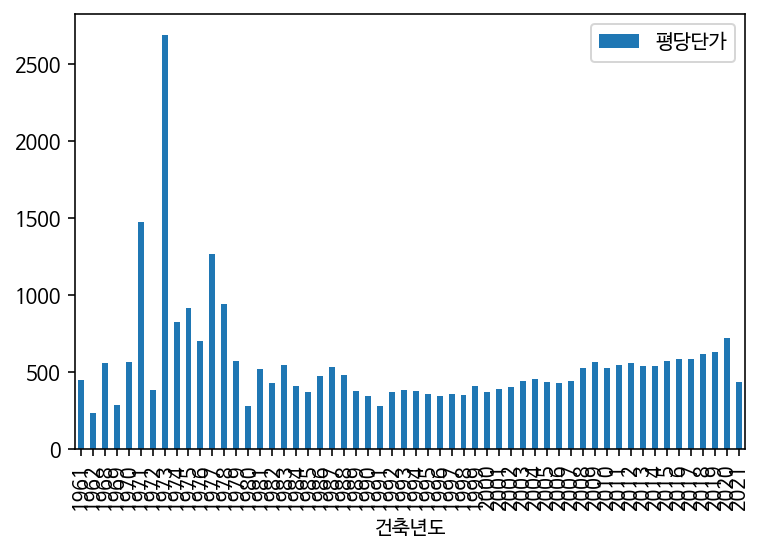

In [25]:
pivot.plot.bar()

In [26]:
#건축년도별 평균 단가를 확인해봅시다.

pivot2 = pd.pivot_table(anyang_df, values='평당단가', index=['건축년도'], columns=['층'], aggfunc='mean')

In [27]:
pivot2

층,-1.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,47.0,48.0,49.0,51.0,53.0,54.0,56.0,61.0,64.0,79.0
건축년도,,,,,,,,,,,,,,,,,,,,,
1961,NaN,NaN,NaN,NaN,NaN,446.588067,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,210.048601,249.274329,241.095889,85.164835,288.176840,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1969,NaN,294.647626,111.386139,NaN,60.506051,840.336134,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,NaN,NaN,NaN,93.509351,NaN,NaN,688.169053,750.729876,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,NaN,437.564662,NaN,1004.500338,2138.256362,1862.512699,2183.240787,1770.813428,1700.720305,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,NaN,237.315876,NaN,232.537536,NaN,138.643811,NaN,NaN,1063.955550,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,NaN,NaN,NaN,NaN,3541.651821,4141.176471,NaN,1086.688071,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,1166.359730,319.078137,764.131466,1062.091305,NaN,330.224351,1332.453593,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='건축년도'>

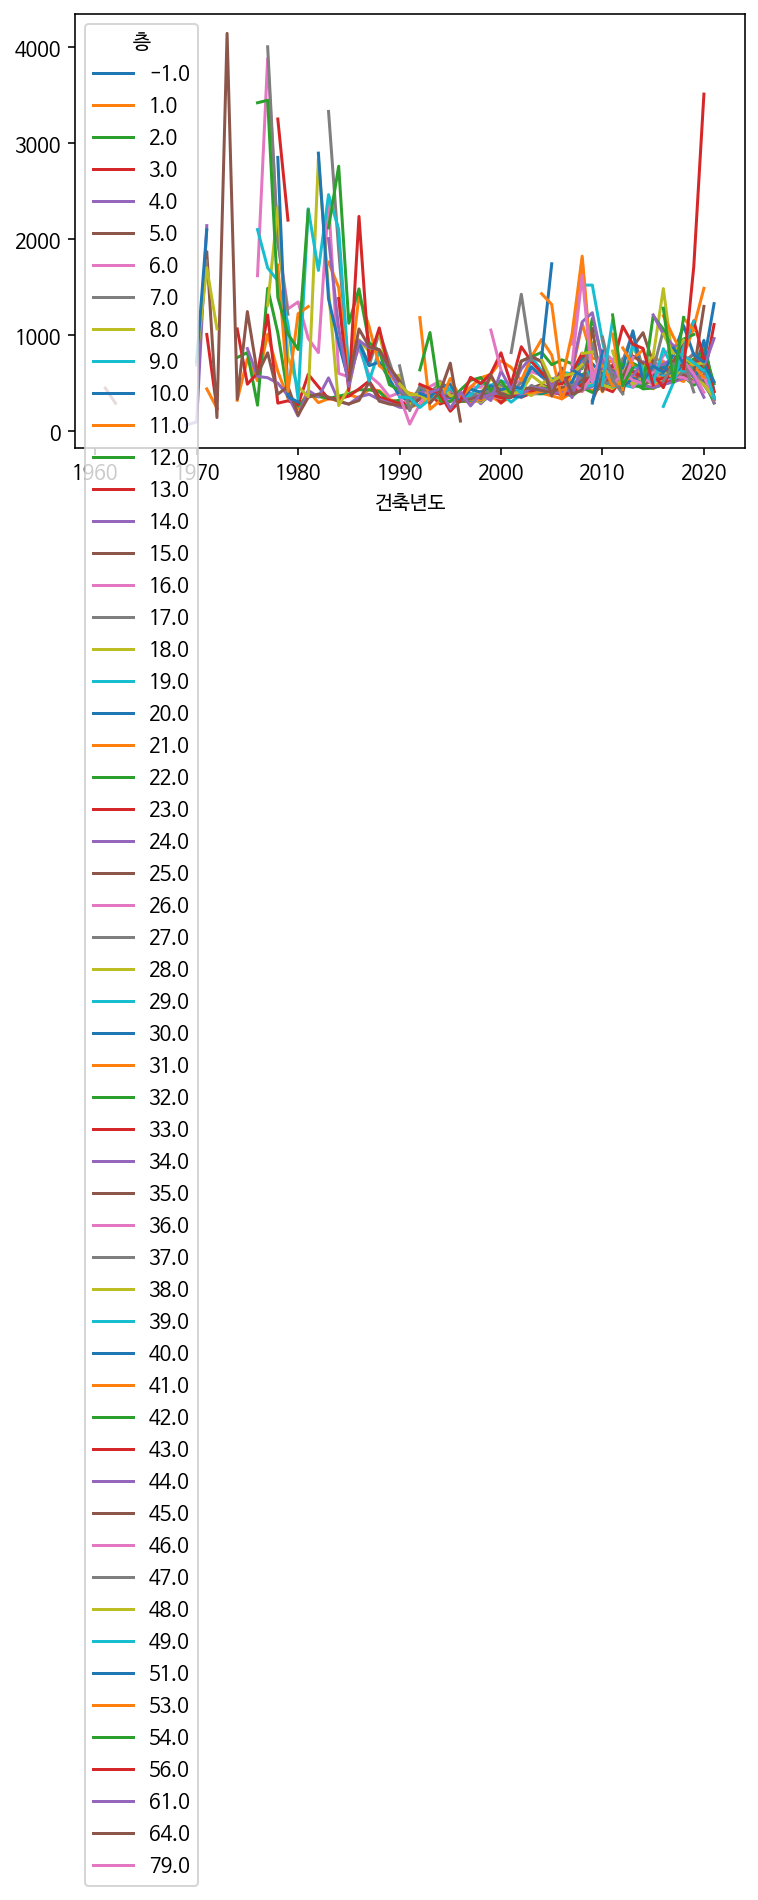

In [28]:
pivot2.plot()

단지별로 가격을 알아봅시다

In [29]:
pivot3 = pd.pivot_table(df, values='평당단가', index=['시군구','단지명'], aggfunc='mean')

In [30]:
pivot3.head()

평당단가
시군구         단지명                     
강원도 강릉시 견소동 송정한신          231.829862
            송정해변신도브래뉴아파트  317.749393
강원도 강릉시 교동  강릉교동롯데캐슬1단지   313.276255
            교동1주공         277.097737
            교동2현대         320.391135

In [31]:
# 가장 비싼 단지
pivot3.sort_values('평당단가', ascending= False)[:10]

,,평당단가
시군구,단지명,
서울특별시 서초구 반포동,반포 주공1단지,3841.414146
서울특별시 강남구 압구정동,한양1차(영동한양),3602.820583
서울특별시 서초구 반포동,반포리체,3582.405421
서울특별시 강남구 청담동,청담자이,3564.571645
서울특별시 강남구 개포동,개포주공 6단지,3548.586568
서울특별시 서초구 잠원동,아크로리버뷰신반포,3538.153084
서울특별시 서초구 반포동,아크로리버파크,3535.803430
서울특별시 강남구 압구정동,"현대5차(71,72동)",3502.371397
서울특별시 서초구 잠원동,신반포8,3496.042216


In [32]:
# 가장 저렴한 단지
pivot3.sort_values('평당단가')[:10]

,,평당단가
시군구,단지명,
전라북도 군산시 신풍동,월명,19.360459
경상남도 양산시 명동,대동빌라2차,22.744503
강원도 정선군 신동읍 조동리,함백아파트,28.430161
경상북도 포항남구 동해면 석리,신형석리3,28.557030
경상북도 칠곡군 약목면 동안리,안국,28.616025
전라북도 익산시 황등면 율촌리,황등,29.891304
경상북도 포항남구 동해면 석리,삼양전원타운,30.236855
경상북도 칠곡군 약목면 관호리,성재,33.264752
강원도 태백시 동점동,동점,33.987915


In [33]:
pivot3 = pivot3.sort_values('평당단가', ascending= False)

<AxesSubplot:xlabel='시군구,단지명'>

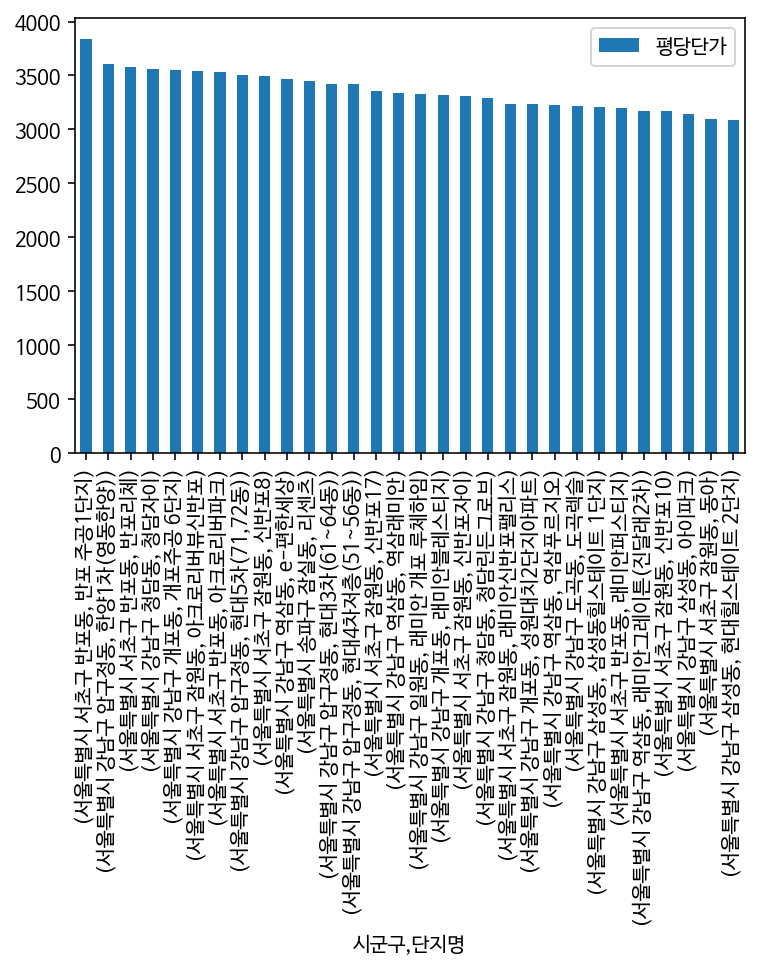

In [34]:
pivot3[:30].plot.bar()